In [1]:
import sys
sys.path.append('C:/Users/manya/Documents/Ironhack/Course/Final-project/src')
import CNN_model 
import os
import matplotlib as plt 

## Model 1: Initial Dataset images (11 categories)

Plot the 11 categories from the initial data set of the Vegetable Image Dataset. 

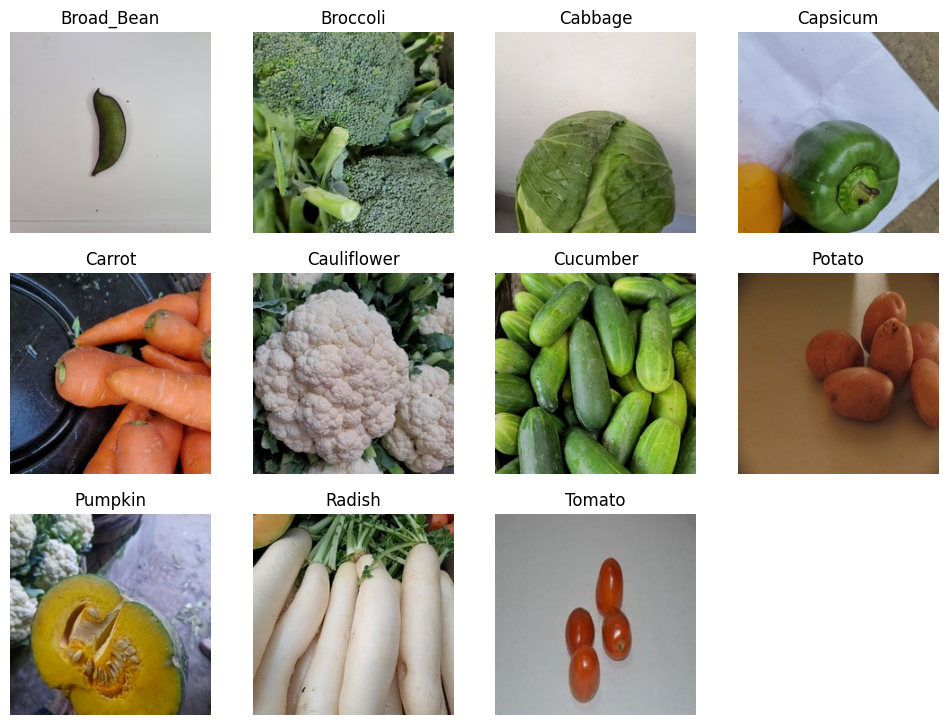

In [11]:
image_categories = os.listdir('C:/Users/manya/Documents/Ironhack/Course/Final-project/images/train') #Categories list
plot_categories = CNN_model.plot_images(image_categories, '../images/train/')
plot_categories.savefig('../graphs/m1_categories')

First is necessary to create the Data Image Generator that serves to provide batches for each set (training, validation and test) since sometimes is not possible to load a large set of images at once. This generator automatically loads the images, pre-processes them and returns the batches of images with their corresponding labels.

The parameters of the function 'flow_from_directory':
- Folders paths to train, validation and test 
- Target_size is the desired size (width pixels x height pixels) images will be resized to be all the same.It is worth noting that reducing the size of the images reduces the computational resources required to train the model, but may also result in a loss of information. Thus, the choice of target size depends on the characteristics of the data set and the requirements of the model. In this model, 150x150 is chosen compared to the original size of 224x224.
- Batch size is the number of images that are processed together in a single forward and backward pass instead of feeding the model with the entire dataset at once. Larger batch sizes will train faster and consume more memory, even though might show lower accuracy. In this model, 32 images will be processed before the model is updated. 


In [4]:
train_image_generator = CNN_model.Image_Data_Generator('../images/train/', (150,150), 32)

Found 11000 images belonging to 11 classes.


In [5]:
val_image_generator = CNN_model.Image_Data_Generator('../images/validation/', (150,150), 32)
test_image_generator = CNN_model.Image_Data_Generator('../images/test/', (150,150), 32)

Found 2200 images belonging to 11 classes.
Found 2200 images belonging to 11 classes.


### Model Creation 
The model will be created using the Keras API. First of all, the model is sequential since we 

In [2]:
model = CNN_model.model_creation(32,64,3,3,[150,150,3],128,11)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [6]:
history = CNN_model.train_model(model, train_image_generator, val_image_generator)

Epoch 1/100
318/344 [==========================>...] - ETA: 15s - loss: 1.1410 - accuracy: 0.6046

KeyboardInterrupt: 

In [ ]:
performance_metrics = CNN_model.plot_trainig_metrics(history)

In [12]:
model.evaluate(test_image_generator)

76/76 [==============================] - 23s 311ms/step - loss: 0.2697 - accuracy: 0.9490


[0.2697182297706604, 0.9489626288414001]

1/1 [==============================] - 0s 125ms/step


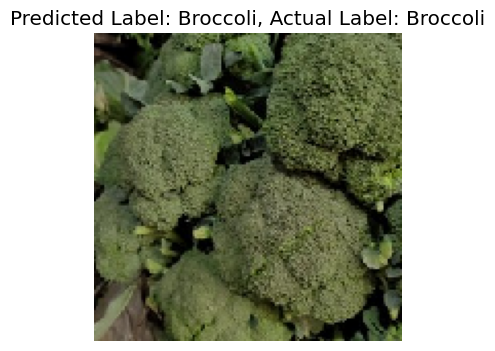

In [13]:
test_image_path = '../images/test/Broccoli/1013.jpg'

def generate_predictions(test_image_path, actual_label):
    
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()

# call the function
generate_predictions(test_image_path, actual_label='Broccoli')

1/1 [==============================] - 0s 23ms/step


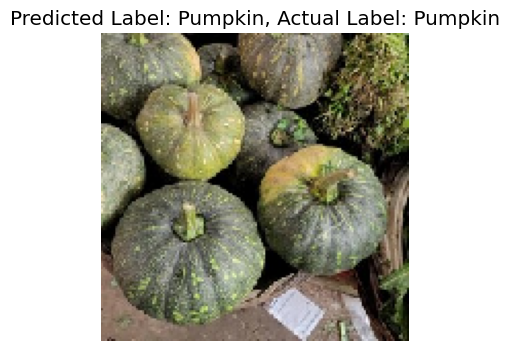

In [14]:
generate_predictions ('../images/test/Pumpkin/1013.jpg', actual_label= 'Pumpkin')

1/1 [==============================] - 0s 19ms/step


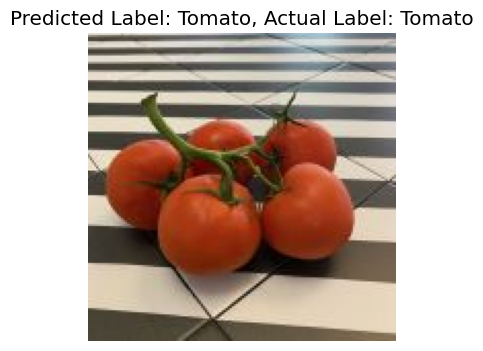

In [15]:
generate_predictions("C:/Users/manya/OneDrive/Imágenes/IMG-8548.jpg", actual_label='Tomato')

1/1 [==============================] - 0s 27ms/step


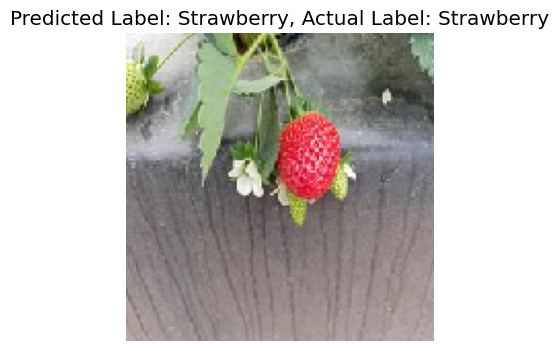

In [19]:
generate_predictions('../images/test/Strawberry/.jpg', actual_label='Strawberry')